In [1]:
import pandas as pd

df = pd.read_csv(r"dataset - 2020-09-24.csv")


In [2]:
df.shape

(571, 59)

ANALISE DO DS INICIAL

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [4]:
df['Club'].value_counts()

Club
Liverpool                   34
Brighton-and-Hove-Albion    33
Tottenham-Hotspur           32
Leicester-City              31
Crystal-Palace              31
Everton                     31
Manchester-United           31
Newcastle-United            30
Arsenal                     30
West-Ham-United             29
Aston-Villa                 28
Sheffield-United            28
West-Bromwich-Albion        28
Manchester-City             27
Chelsea                     27
Leeds-United                26
Fulham                      25
Southampton                 24
Burnley                     24
Wolverhampton-Wanderers     22
Name: count, dtype: int64

Observamos que temos 58 colunas para 571 jogadores, algumas equipas apresentam mais jogadores que outras, e o dataset aparenta ter muitos dados em falta, vamos então estudar se esses dados em falta fazem sentido, ou se são um problema crítico para a nossa análise.

In [5]:
gk_df = df[df['Position'] == 'Goalkeeper'].copy()

def_df = df[df['Position'] == 'Defender'].copy()

mid_df = df[df['Position'] == 'Midfielder'].copy()

fwd_df = df[df['Position'] == 'Forward'].copy()


---------------------

2 ANALISE DE DADOS EM FALTA

In [6]:
def nan_per_pos(ds):


    n = ds.isnull().groupby(ds['Position']).sum()

    return n

In [7]:
nulos_por_posicao = nan_per_pos(df)

---------------------------

2.1 GUARDA REDES

In [8]:
gk_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0 to 550
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    69 non-null     object 
 1   Jersey Number           67 non-null     float64
 2   Club                    69 non-null     object 
 3   Position                69 non-null     object 
 4   Nationality             69 non-null     object 
 5   Age                     69 non-null     float64
 6   Appearances             69 non-null     int64  
 7   Wins                    69 non-null     int64  
 8   Losses                  69 non-null     int64  
 9   Goals                   69 non-null     int64  
 10  Goals per match         0 non-null      float64
 11  Headed goals            0 non-null      float64
 12  Goals with right foot   0 non-null      float64
 13  Goals with left foot    0 non-null      float64
 14  Penalties scored        0 non-null      float64


Com esta análise podemos concluir que os dados em falta não são relevantes para o problema em estudo, por exemplo 'Goals per Match',e outras colunas relativas a golos apenas tem dados em falta para GK e Defenders, que são posições onde golos não são muito relevantes. 

A melhor forma de analisar estes dados é fazendo uma análise individual por posições.

Começando pelo guarda redes, vemos que para esta posição existem dados em falta para TODOS os guarda redes nas colunas realtivas a GOLOS, DEFENSEIVE STATS (tackles, interseptions, clearances, duels), e OFFENSIVE STATS (chances criadas, cruzamentos, remates). 

Podemos então remover todas as colunas que apenas apresentam valores nulos do ds de guardaredes




In [9]:
gk_df = gk_df.dropna(axis=1, how='all')

In [10]:
gk_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0 to 550
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    69 non-null     object 
 1   Jersey Number           67 non-null     float64
 2   Club                    69 non-null     object 
 3   Position                69 non-null     object 
 4   Nationality             69 non-null     object 
 5   Age                     69 non-null     float64
 6   Appearances             69 non-null     int64  
 7   Wins                    69 non-null     int64  
 8   Losses                  69 non-null     int64  
 9   Goals                   69 non-null     int64  
 10  Clean sheets            69 non-null     float64
 11  Goals conceded          69 non-null     float64
 12  Own goals               69 non-null     float64
 13  Errors leading to goal  69 non-null     float64
 14  Assists                 69 non-null     int64  


-------------------------------------------

2.2 DEFESAS

In [11]:
def_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 3 to 558
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    194 non-null    object 
 1   Jersey Number           191 non-null    float64
 2   Club                    194 non-null    object 
 3   Position                194 non-null    object 
 4   Nationality             194 non-null    object 
 5   Age                     194 non-null    float64
 6   Appearances             194 non-null    int64  
 7   Wins                    194 non-null    int64  
 8   Losses                  194 non-null    int64  
 9   Goals                   194 non-null    int64  
 10  Goals per match         3 non-null      float64
 11  Headed goals            194 non-null    float64
 12  Goals with right foot   194 non-null    float64
 13  Goals with left foot    194 non-null    float64
 14  Penalties scored        3 non-null      float64

Para os defesas temos estatisticas diferentes, podemos contudo confirmar que para as colunas que têm dados em falta, estão em falta dados de todos os defesas, temos no entanto 3 outliers, defesas que têm estatisticas em colunas que 98% dos defesas não têm, e nas colunas em que os defesas têm dados em falta, esses 3 jogadores apresentam dados, nem que sejam zero, supomos que sejam jogadores que tenham sido identificados como defesas mas podem não ser defesas.



In [12]:
def_df_test= def_df.drop([41,326,531],axis=0)
def_outliers = df[df.index.isin([41,326,531])]

In [13]:
def_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 3 to 558
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    191 non-null    object 
 1   Jersey Number           188 non-null    float64
 2   Club                    191 non-null    object 
 3   Position                191 non-null    object 
 4   Nationality             191 non-null    object 
 5   Age                     191 non-null    float64
 6   Appearances             191 non-null    int64  
 7   Wins                    191 non-null    int64  
 8   Losses                  191 non-null    int64  
 9   Goals                   191 non-null    int64  
 10  Goals per match         0 non-null      float64
 11  Headed goals            191 non-null    float64
 12  Goals with right foot   191 non-null    float64
 13  Goals with left foot    191 non-null    float64
 14  Penalties scored        0 non-null      float64

Agora podemos remover os dados em falta com certeza. Analisando as colunas com dados em falta temos estatisticas de golos por  jogo, penaltis, remates, oportunidades grandes falhadas, e estatisticas de guardaredes, ou seja não se perde grande coisa.

Ficamos então com colunas relativas a golos, e tipos de golos, estatisticas defensivas, passes e erros que resularam em golo etc. várias estatisticas que podemos usar de forma a extrair insights valiosos.

In [14]:
def_df_test = def_df_test.dropna(axis=1,how='all') 

In [15]:
def_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 3 to 558
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    191 non-null    object 
 1   Jersey Number           188 non-null    float64
 2   Club                    191 non-null    object 
 3   Position                191 non-null    object 
 4   Nationality             191 non-null    object 
 5   Age                     191 non-null    float64
 6   Appearances             191 non-null    int64  
 7   Wins                    191 non-null    int64  
 8   Losses                  191 non-null    int64  
 9   Goals                   191 non-null    int64  
 10  Headed goals            191 non-null    float64
 11  Goals with right foot   191 non-null    float64
 12  Goals with left foot    191 non-null    float64
 13  Hit woodwork            191 non-null    float64
 14  Clean sheets            191 non-null    float64

-------------------------------------

2.3 MIDFLIEDERS

In [16]:
mid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 13 to 565
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    198 non-null    object 
 1   Jersey Number           196 non-null    float64
 2   Club                    198 non-null    object 
 3   Position                198 non-null    object 
 4   Nationality             197 non-null    object 
 5   Age                     197 non-null    float64
 6   Appearances             198 non-null    int64  
 7   Wins                    198 non-null    int64  
 8   Losses                  198 non-null    int64  
 9   Goals                   198 non-null    int64  
 10  Goals per match         196 non-null    float64
 11  Headed goals            198 non-null    float64
 12  Goals with right foot   198 non-null    float64
 13  Goals with left foot    198 non-null    float64
 14  Penalties scored        196 non-null    float6

Analisando os dados em falta dos meio campistas, constantamo-nos com resultados bastante diferentes, com os obtidos até agora, em algumas colunas, como as colunas de gk, observamos todos os jogadores com dados em falta.

Nesta posição para certas categorias como passes e cruzamentos, algumas estatisticas defensivas observamos apenas 6 jogadores com dados em falta.

Em algumas categorias de remates, existem 2 jogadores com dados em falta.

Para outras categorias, como golos sofridos algumas outras estatisticas defensivas, autogolos etc apresentam 99% dos dados em falta

Ou seja o tratamento de dados em falta vai ser mais complicada que a das restantes posições, uma possivel explicação pode ser que a posição dada aos jogadores pode estar errada, ou então como um meio campista pode ser mais avançado ou mais defensivo, cada um capta dados mais especificos para a posição.

Apesar deste problema, os dados em falta não afetam de todo a nossa análise, pois as colunas que apresentam masi de 90% de dados em falta são pouco informativas para a posição.

Após um análise á tabela nulos_por_posição podemos observar padrões engraçados, podemos reparar que os 6 jogadores que apresentam valores em falta apenas se apresentam em falta qunado os atacantes apresentam valores em falta(como podemos observar na figura abaixo), o que possa significar que esses jogadores sejam na verdade avançados, ou possivelmente médios ofensivos. 

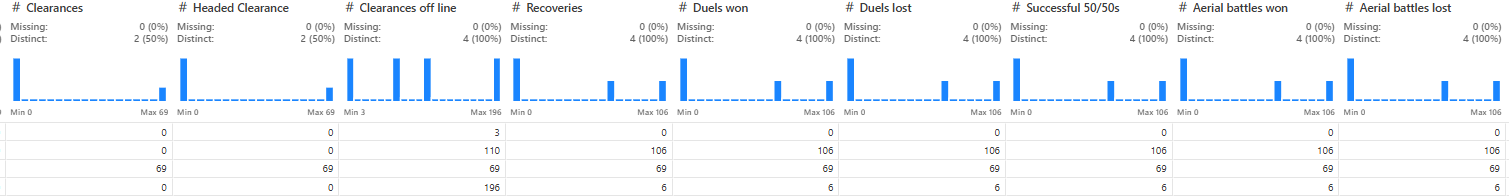

Usando a mesma lógica podemos analisar os 2 jogadores que foram tratados como médios, que apresentam dados em falta apenas quando os defesas apresentam dados em falta como podemos observar na figura abaixo.

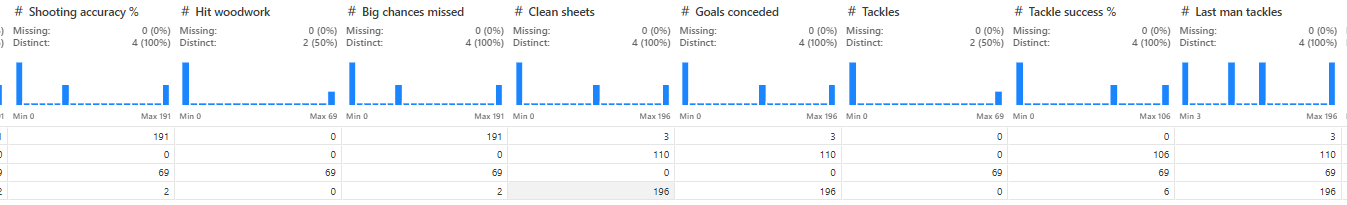

Usando essa lógica os jogadores outliers na secção de defesa que antes não sabiamos tratar agora sabemos que foram assumidos como defesas mas que na verdade deveriam ser médios como podemos observar na figura abaixo, esses 3 jogadores apenas apresentam dados em falta quando os médios apresentam dados em falta.

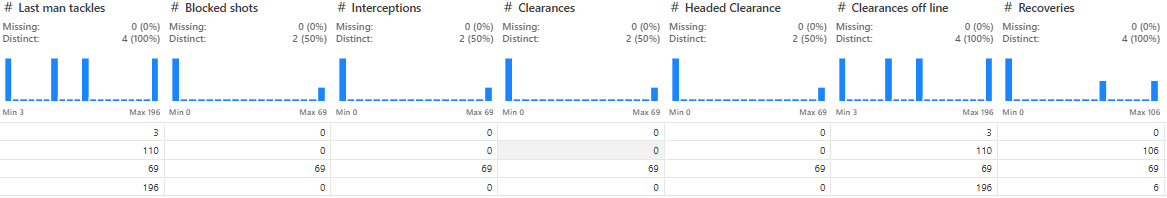

Desta forma concluimos que na verdade não há dados em falta que sejam relevantes para a posição, houve apenas alguns jogadores que foram associados á posição errada.

---------------------------------------

2.4 AVANÇADOS

In [17]:
fwd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 23 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    110 non-null    object 
 1   Jersey Number           109 non-null    float64
 2   Club                    110 non-null    object 
 3   Position                110 non-null    object 
 4   Nationality             110 non-null    object 
 5   Age                     110 non-null    float64
 6   Appearances             110 non-null    int64  
 7   Wins                    110 non-null    int64  
 8   Losses                  110 non-null    int64  
 9   Goals                   110 non-null    int64  
 10  Goals per match         110 non-null    float64
 11  Headed goals            110 non-null    float64
 12  Goals with right foot   110 non-null    float64
 13  Goals with left foot    110 non-null    float64
 14  Penalties scored        110 non-null    float6

No caso dos jogadores avançados, observamos 4 medios no df de atacantes

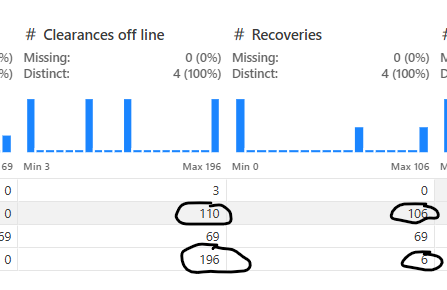

3. Tratamento de Outleirs

-------------------------------------------

In [18]:
idx_def_mid_list = def_df[def_df['Clearances off line'].isnull()].index
idx_mid_fwd_list = mid_df[mid_df['Recoveries'].isnull()].index
idx_mid_def_list =  mid_df[mid_df['Big chances missed'].isnull()].index
idx_fwd_mid_list = fwd_df[fwd_df['Tackle success %'].notnull()].index


linhas_def_mid = def_df.loc[idx_def_mid_list].copy()
linhas_mid_fwd = mid_df.loc[idx_mid_fwd_list].copy()
linhas_mid_def = mid_df.loc[idx_mid_def_list].copy()
linhas_fwd_mid = fwd_df.loc[idx_fwd_mid_list].copy()

def_df = pd.concat([def_df, linhas_mid_def])
mid_df = pd.concat([mid_df, linhas_def_mid, linhas_fwd_mid])
fwd_df = pd.concat([fwd_df, linhas_mid_fwd])

def_df = def_df.drop(idx_def_mid_list)
mid_df = mid_df.drop(idx_mid_fwd_list)
mid_df = mid_df.drop(idx_mid_def_list)
fwd_df = fwd_df.drop(idx_fwd_mid_list)


In [19]:
def_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 3 to 217
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    193 non-null    object 
 1   Jersey Number           190 non-null    float64
 2   Club                    193 non-null    object 
 3   Position                193 non-null    object 
 4   Nationality             193 non-null    object 
 5   Age                     193 non-null    float64
 6   Appearances             193 non-null    int64  
 7   Wins                    193 non-null    int64  
 8   Losses                  193 non-null    int64  
 9   Goals                   193 non-null    int64  
 10  Goals per match         0 non-null      float64
 11  Headed goals            193 non-null    float64
 12  Goals with right foot   193 non-null    float64
 13  Goals with left foot    193 non-null    float64
 14  Penalties scored        0 non-null      float64

In [20]:
mid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 13 to 543
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    197 non-null    object 
 1   Jersey Number           195 non-null    float64
 2   Club                    197 non-null    object 
 3   Position                197 non-null    object 
 4   Nationality             196 non-null    object 
 5   Age                     196 non-null    float64
 6   Appearances             197 non-null    int64  
 7   Wins                    197 non-null    int64  
 8   Losses                  197 non-null    int64  
 9   Goals                   197 non-null    int64  
 10  Goals per match         197 non-null    float64
 11  Headed goals            197 non-null    float64
 12  Goals with right foot   197 non-null    float64
 13  Goals with left foot    197 non-null    float64
 14  Penalties scored        197 non-null    float6

In [21]:
fwd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 23 to 511
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    112 non-null    object 
 1   Jersey Number           111 non-null    float64
 2   Club                    112 non-null    object 
 3   Position                112 non-null    object 
 4   Nationality             112 non-null    object 
 5   Age                     112 non-null    float64
 6   Appearances             112 non-null    int64  
 7   Wins                    112 non-null    int64  
 8   Losses                  112 non-null    int64  
 9   Goals                   112 non-null    int64  
 10  Goals per match         112 non-null    float64
 11  Headed goals            112 non-null    float64
 12  Goals with right foot   112 non-null    float64
 13  Goals with left foot    112 non-null    float64
 14  Penalties scored        112 non-null    float6

Podemos então concluir a análise de outliers e dados em fatla na coluna posição, e podemos passar para a remoção de colunas que apresentam apenas dados em falta para cada posição.

-------------

4. Remoção de Dados em falta

In [22]:
gk_df = gk_df.dropna(axis=1, how='all')
def_df = def_df.dropna(axis=1, how='all')
mid_df = mid_df.dropna(axis=1, how='all')
fwd_df = fwd_df.dropna(axis=1, how='all')

-----------

5. Estudo de Usage Rate de cada posição

O usage rate vai ser medido de forma diferente para cada posição, mas de forma geral vamos calcular: 

Usage Rate = ações do jogador*100/ ações totais da equipa

Player overall = ações boas/ações totais

cada posição tem a sua lista de ações, nesse caso, vamos ter para todas as contas verificar qual a posição do jogador e usar os valores de acordo com a sua lista de ações

In [32]:
def acoes_jogador(lista_acoes,ds):
    ds['n_x']=0.0
    for id,jogador in ds.iterrows():
        x=jogador[lista_acoes].sum()
        ds.at[id, 'n_x'] = x
    return ds

In [ ]:
def usage_rate(gk_ds,def_ds,mid_ds,fwd_ds):
    ds = pd.concat([gk_ds,def_ds,mid_ds,fwd_ds])
    
    ds['Usage Rate'] = 0.0

    for club, club_players in ds.groupby('Club'):
        team_total = club_players['n_x'].sum()
        for idx, player in club_players.iterrows():
            ds.at[idx, 'Usage Rate'] = (player['n_x'] / team_total) * 100

    return ds


def player_overall(lista_acoes_boas, lista_acoes_mas, ds):
    ds = ds.copy()
    ds['Overall'] = 0.0

    for i, player in ds.iterrows():
        good = player[lista_acoes_boas].sum()
        total = player[lista_acoes_boas + lista_acoes_mas].sum()
        overall = good / total if total > 0 else 0
        ds.at[i, 'Overall'] = overall
    return ds



In [33]:
# gk_ds = acoes_jogador(lista_acoes_gk, gk_df)
# def_ds = acoes_jogador(lista_acoes_def, def_df)
# mid_ds = acoes_jogador(lista_acoes_mid, mid_df)
# fwd_ds = acoes_jogador(lista_acoes_fwd, fwd_df)

---------

5.1 Guarda Redes

In [25]:
gk_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0 to 550
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    69 non-null     object 
 1   Jersey Number           67 non-null     float64
 2   Club                    69 non-null     object 
 3   Position                69 non-null     object 
 4   Nationality             69 non-null     object 
 5   Age                     69 non-null     float64
 6   Appearances             69 non-null     int64  
 7   Wins                    69 non-null     int64  
 8   Losses                  69 non-null     int64  
 9   Goals                   69 non-null     int64  
 10  Clean sheets            69 non-null     float64
 11  Goals conceded          69 non-null     float64
 12  Own goals               69 non-null     float64
 13  Errors leading to goal  69 non-null     float64
 14  Assists                 69 non-null     int64  


Vamos então fazer uma análise das colunas de guarda redes. 

Começamos por **Golos**, que não é uma boa métrica para guarda redes. 

Podemos usar **Goals conceded**, **Own goals** e **Errors leading to goal**  para a lista de más acoes, se dividirmos por appearances.

Podemos usar **Passes per match** para o usage rate.

**Accurate long balls** se dividirmos por appearances para a lista de boas acoes.

**Saves**, **Punches**, **High Claims**, **Catches**, **Sweeper clearances**, **Throw outs**, podem ser adicionadas a boas acoes se divididas por appearances. 

In [26]:
usage_rate_gk = [""]
acoes_boas_gk = [""]
acoes_mas_gk = [""]

---------

5.2 Defesas

In [27]:
def_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 3 to 217
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    193 non-null    object 
 1   Jersey Number           190 non-null    float64
 2   Club                    193 non-null    object 
 3   Position                193 non-null    object 
 4   Nationality             193 non-null    object 
 5   Age                     193 non-null    float64
 6   Appearances             193 non-null    int64  
 7   Wins                    193 non-null    int64  
 8   Losses                  193 non-null    int64  
 9   Goals                   193 non-null    int64  
 10  Headed goals            193 non-null    float64
 11  Goals with right foot   193 non-null    float64
 12  Goals with left foot    193 non-null    float64
 13  Hit woodwork            193 non-null    float64
 14  Clean sheets            193 non-null    float64

In [28]:
# for club,club_players in def_df.groupby("Club"):
#     print(club)
#     print(club_players["Goals conceded"])

Seleção de ações de defesa, vamos possivelmente focarmo-nos em mais estatisticas defensivas:

Começando por analisar **Conceeded Goals**, reparamos que defesas da mesma equipa têm numeros diferentes de golos sofridos, o que não faz muito sentido. Fazendo a divisão de golos sofridos por apperances (jogos jogados), esse método de feature engeneering vai ser usado para muitas outras características.
Esta característica também não entra nas ações para o usage rate de um jogador mas sim para as acoes mas.

O mesmo se aplica para **Goals**, esta caracteristica tambem deve ser dividida por apperances, e adicionada á lista de boas acoes. Outras classes de golos são redundantes de considerarmos golos.

De seguida temos **Tackles**, e Tackle Success %(que é redundante)(no entanto podemos ver a quantidade de tackles bem sucedidas e as mal sucedidas, e adicionar a lista de acoes boas e mas respetivamente), Tackles podem ser adicionadas se dividir-mos por appearances a lista de boas ações de cada jogador. **Last Man Tackles** são redundantes se considerarmos tackles.

**Blocked shots**, **Interceptions**, **Clearances**, podem ser consideradas se dividirmos por appearances a ações boas. as restantes clearances são redundantes.

**Recoveries** e **Duels Won** podem ser adicionadas a boas acoes. **Duels Lost** podem ser adicionadas a acoes mas, se dividirmos por appearances.

**Successful 50/50s** podem ser usados para acoes boas se dividirmos por appearances.

**Aerial battles lost** podem ser usadas na lista de acoes mas se divirmos por appearances e **Aerial battles won** o mesmo, para a lista de acoes boas.

**Own Goals**, podem ser adicionadas a lista de acoes mas se dividirmos por appearances. 

**Errors leading to goal** podem ser divididas por appearances, e adicionadas á lista de acoes mas.

**Assists** podem ser divididas por appearances e adicionadas a lista de acoes boas, possivelmente a lista de usage rate.

**Passes per match** podem ser usados no usage rate, passes fica redundante.

**Big chances created** podem ser usadas para usage rate e para acoes boas se divididas por appearances.

**Crosses** podem ser adicionadas ao usage rate se divididas por appearances

**Cross accuracy %** pode ser usada para acoes boas e mas, usando crosses

**Through balls** podem ser adicionadas a usage rate se assomirmos que não são passes normais, e se dividirmos por appearance.

**Accurate Long balls** podem ser adicionadas a usage rate, se dividirmos por appearance.


**lista de usage rate**

Passes per match

Crosses/appearance

Through balls/appearance

Big chances created/appearance

**lista de acoes boas**






**lista de acoes mas**




In [29]:
lista_acoes_def = [""]

-------

5.3 Médios

In [30]:
mid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 13 to 543
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    197 non-null    object 
 1   Jersey Number           195 non-null    float64
 2   Club                    197 non-null    object 
 3   Position                197 non-null    object 
 4   Nationality             196 non-null    object 
 5   Age                     196 non-null    float64
 6   Appearances             197 non-null    int64  
 7   Wins                    197 non-null    int64  
 8   Losses                  197 non-null    int64  
 9   Goals                   197 non-null    int64  
 10  Goals per match         197 non-null    float64
 11  Headed goals            197 non-null    float64
 12  Goals with right foot   197 non-null    float64
 13  Goals with left foot    197 non-null    float64
 14  Penalties scored        197 non-null    float6

Passamos então para a análise das características dos  médios:

**lista de usage rate:**

shots/appearance

passes per match

big chances created/appearance

crosses/appearance 

through balls/appearance

**lista de acoes boas:**



**lista de acoes mas:**



----------

5.4 avançados

In [31]:
fwd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 23 to 511
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   112 non-null    object 
 1   Jersey Number          111 non-null    float64
 2   Club                   112 non-null    object 
 3   Position               112 non-null    object 
 4   Nationality            112 non-null    object 
 5   Age                    112 non-null    float64
 6   Appearances            112 non-null    int64  
 7   Wins                   112 non-null    int64  
 8   Losses                 112 non-null    int64  
 9   Goals                  112 non-null    int64  
 10  Goals per match        112 non-null    float64
 11  Headed goals           112 non-null    float64
 12  Goals with right foot  112 non-null    float64
 13  Goals with left foot   112 non-null    float64
 14  Penalties scored       112 non-null    float64
 15  Freekicks 

**lista de usage rate:**

shots/appearance

passes per match

big chances created/appearance

crosses/appearance 

through balls/appearance

**lista de acoes boas:**



**lista de acoes mas:**


----------

6. Como Usage Rate é melhor que outras métricas para avaliar jogadores